In [64]:
import numpy as np
import matplotlib.pyplot as plt

最少重叠像素数：4

边长：L

每块的边长：d

单边分块数：$ n \geq \left[ \frac{l+4}{28} \right] +1$

In [65]:
s = 4
# l = 512
d = 32

img = plt.imread('../Pictures/lena.tif')
# plt.imshow(img, cmap='gray')

In [112]:
def Img2Patch(img, d, s):
    '''
    Divide the image into patches

    Parameters
    ----------
    img : ndarray
        The image to be divided.
    d : int
        The size of the patch.
    s : int
        Minimum number of overlapping pixels between patches.

    Returns
    -------
    patches : ndarray
        The patches of the image.
    locs : ndarray
        The locations of the patches.
    dcs : ndarray
        The DC components of the patches.
    '''
    h, l = img.shape
    _nh = (h - s) // (d - s) + 1
    _nl = (l - s) // (d - s) + 1

    _loc_y = np.linspace(0, h - d, _nh).astype(int)
    _loc_x = np.linspace(0, l - d, _nl).astype(int)
    _locs = np.meshgrid(_loc_x, _loc_y)
    _loc_x_ = _locs[0].flatten()
    _loc_y_ = _locs[1].flatten()
    # Initialization
    _patches = []
    _dcs = []

    for i in range(len(_loc_x_)):
        _x = _loc_x_[i]
        _y = _loc_y_[i]
        _patch = img[_y: _y+d, _x: _x+d].reshape(-1, 1)

        _dc = np.mean(_patch)
        _dcs.append(_dc)
        _patch = _patch - _dc
        _patches.append(_patch)

    _patches = np.concatenate(_patches, axis=1)
    return _patches, [_loc_x, _loc_y], _dcs

In [113]:
patches, locs, dcs = Img2Patch(img, d, s)

In [123]:
# Reconstruct the image
_d = int(patches.shape[0]**0.5)

_loc_x, _loc_y = locs
_nl = len(_loc_x)
_nh = len(_loc_y)
_l = _loc_x[-1] + _d
_h = _loc_y[-1] + _d

_img = np.zeros((_h, _l))
# Put the patch back in its place
for idx in range(patches.shape[1]):
    _patch = patches[:, idx].reshape(_d, -1)    # Transform the column vector into a matrix
    _patch = _patch + dcs[idx]                  # Add the DC component

    # Locate the patch
    _x = _loc_x[idx % _nl]
    _y = _loc_y[idx // _nl]
    _img[_y:_y+_d, _x:_x+_d] += _patch


# Average the overlapping area
for j in range(1, _nl):
    _img[:, _loc_x[j]:_loc_x[j-1]+_d] = _img[:, _loc_x[j]:_loc_x[j-1]+_d] / 2

for i in range(1, _nh):
    _img[_loc_y[i]:_loc_y[i-1]+_d, :] = _img[_loc_y[i]:_loc_y[i-1]+_d, :] / 2

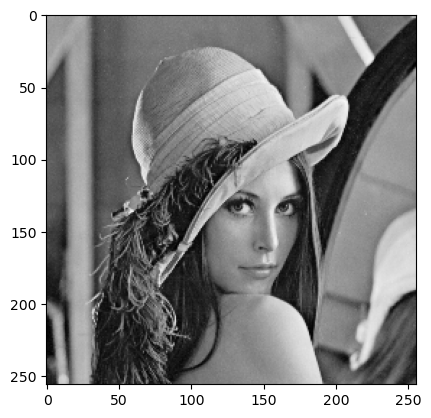

In [125]:
plt.imshow(_img, cmap='gray')